## Artificial Neural Networks with Keras


Keras is a high-level Deep Learning API that allows you to easily build, train, evaluate, and execute all sorts of neural networks. To perform the heavy computations required by neural networks, it relies on a computation backend. At present, you can choose from three popular opensource Deep Learning libraries: TensorFlow, Microsoft Cognitive Toolkit
(CNTK), and Theano.

Moreover, TensorFlow itself now comes bundled with its own Keras implementation, tf.keras. It only supports TensorFlow as the backend, but it has the advantage of offering some very useful extra features, for example, it supports TensorFlow’s Data API, which makes it easy to load and preprocess data efficiently.


 - Building image classifier
 - Building regression MLP (_Multilayer Perceptron_)
 - Complex model with functional API
 - Subclassing API to build dynamic models
 - Saving and restoring model
 - Using callbacks in training
 - Tensorboard
 - __Hyperparameters tunig__



### Setup

Importing common modules. Using the Python3 as well as Scikit-Learn ≥0.20.

In [40]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
RESOURCE_DIR = os.path.join(PROJECT_ROOT_DIR, "resource")

def save_fig(fig, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(RESOURCE_DIR, fig + "." + fig_extension)
    print("Saving figure...", fig)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    



### Building an image classifier


In [41]:
# First let's import TensorFlow and Keras.


import tensorflow as tf
from tensorflow import keras

In [42]:
tf.__version__

'2.11.0'

In [43]:
keras.__version__

'2.11.0'

In [44]:
# Let's start by loading the fashion MNIST dataset. Keras has a number of functions 
# to load popular datasets in `keras.datasets`. The dataset is already split for 
# you between a training set and a test set, but it can be useful to split 
# the training set further to have a validation set.


fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [45]:
# The training set contains 60,000 grayscale images, each 28x28 pixels.


X_train_full.shape

(60000, 28, 28)

In [46]:
# Each pixel intensity is represented as a byte (0 to 255).


X_train_full.dtype

dtype('uint8')

In [47]:
# Let's split the full training set into a validation set and a (smaller, last 5000) 
# training set. We also scale the pixel intensities down to the 0-1 range 
# and convert them to floats, by dividing by 255. 
#
#Additionally, since we are going to train the neural network using Gradient Descent, 
# we must scale the input features.


X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

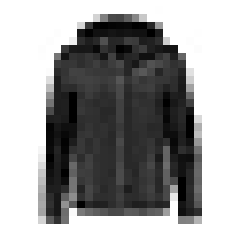

In [48]:
# You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
# color map.


plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [49]:
# The labels are the class IDs (represented as uint8), from 0 to 9.

y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [50]:
# Here are the corresponding class names.

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [51]:
# So the first image in the training set is a coat.

class_names[y_train[0]]

'Coat'

In [52]:
# The validation set contains 5,000 images, and the test set contains 10,000 images.

X_valid.shape

(5000, 28, 28)

In [53]:
X_test.shape

(10000, 28, 28)

Saving figure... fashion_mnist_plot


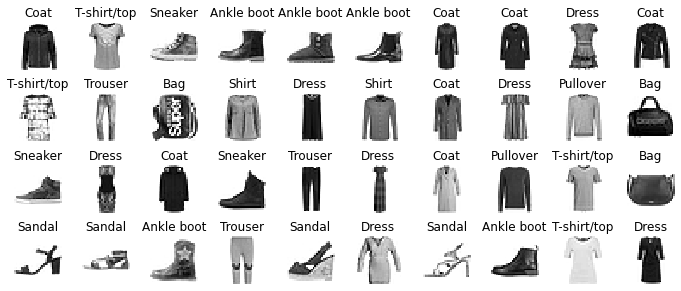

In [54]:
# Let's take a look at a sample of the images in the dataset in 4x10 grid.

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [55]:
# Now let’s build the neural network! Here is a classification MLP with two hidden layers.
#
# The first layer and add it to the model. It is a Flatten layer whose role is to 
# convert each input image into a 1D array, if it receives input data X , 
# it computes X.reshape(-1, 1) 
#
# Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation 
# function.
#
# Then we add a second Dense hidden layer with 100 neurons, also using the ReLU 
# activation function.
#
# Finally, we add a Dense output layer with 10 neurons (one per class), using the 
# softmax activation function (because the classes are exclusive).


model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [56]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [57]:
# Instead of adding the layers one by one as we just did, you can pass a list
# of layers when creating the Sequential model.
#
# The shape of the weight matrix depends on the number of inputs. This is why it is
# recommended to specify the input_shape when creating the first layer in a
# Sequential model. However, if you do not specify the input shape, it’s OK: Keras
# will simply wait until it knows the input shape before it actually builds the model.


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [58]:
model.layers

In [112]:
# Dense layers often have a lot of parameters. For example, the
# first hidden layer has 784 × 300 connection weights, plus 300 bias terms,
# which adds up to 235,500 parameters! This gives the model quite a lot of
# flexibility to fit the training data, but it also means that the model runs the
# risk of overfitting, especially when you do not have a lot of training data.
#
# Complex model has a risk to overfit!


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 30)                270       
                                                                 
 dense_19 (Dense)            (None, 30)                930       
                                                                 
 dense_20 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


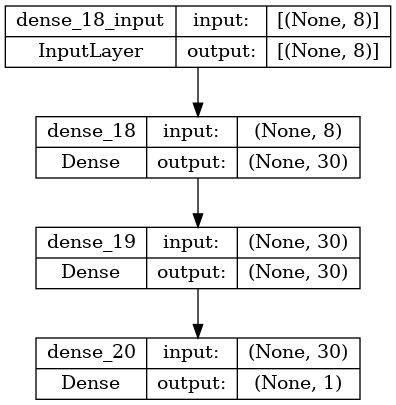

In [113]:
keras.utils.plot_model(model, "resource/my_fashion_mnist_model.png", show_shapes=True)

In [61]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [62]:
model.get_layer(hidden1.name) is hidden1

True

In [63]:
weights, biases = hidden1.get_weights()

In [64]:
weights

array([[-0.06111916, -0.04079123, -0.06318589, ...,  0.06584536,
         0.05508354,  0.0097732 ],
       [-0.03781921,  0.046078  ,  0.06775023, ..., -0.05698601,
         0.05241117,  0.02067833],
       [-0.03054678,  0.02646337, -0.03431542, ...,  0.04846076,
         0.01414314,  0.01600082],
       ...,
       [ 0.04511474, -0.00856753,  0.04326578, ...,  0.02681568,
        -0.06220669,  0.02591295],
       [-0.027183  ,  0.02078319, -0.0145184 , ...,  0.04612534,
         0.01242442,  0.05021076],
       [-0.01368167,  0.05500107, -0.06967793, ...,  0.03485298,
         0.04437702, -0.03601008]], dtype=float32)

In [65]:
weights.shape

(784, 300)

In [66]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [67]:
biases.shape

(300,)

In [68]:
# Use the "sparse_categorical_crossentropy" loss because we have sparse
# labels (i.e., for each instance, there is just a target class index, from 0 to 9
# in this case), and the classes are exclusive. If instead we had one target
# probability per class for each instance (such as one-hot vectors, 
# e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we
# would need to use the "categorical_crossentropy" loss instead. If we
# were doing binary classification (with one or more binary labels), then we
# would use the "sigmoid" (i.e., logistic) activation function in the output
# layer instead of the "softmax" activation function, and we would use the
# "binary_crossentropy" loss.

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [69]:
# We pass it the input features ( X_train ) and the target classes ( y_train ),
# as well as the number of epochs to train (or else it would default to just 1,
# which would definitely not be enough to converge to a good solution). We
# also pass a validation set (this is optional). Keras will measure the loss and
# the extra metrics on this set at the end of each epoch, which is very useful
# to see how well the model really performs. If the performance on the
# training set is much better than on the validation set, your model is
# probably overfitting the training set (or there is a bug, such as a data
# mismatch between the training set and the validation set).


history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7179 - accuracy: 0.7653 - val_loss: 0.5267 - val_accuracy: 0.8194
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4888 - accuracy: 0.8297 - val_loss: 0.4369 - val_accuracy: 0.8498
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4428 - accuracy: 0.8434 - val_loss: 0.5497 - val_accuracy: 0.7920
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4162 - accuracy: 0.8557 - val_loss: 0.3959 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3977 - accuracy: 0.8611 - val_loss: 0.3819 - val_accuracy: 0.8670
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3790 - accuracy: 0.8668 - val_loss: 0.3764 - val_accuracy: 0.8740
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3670 - accuracy: 0.8707 - val_loss: 0.3686 - val_accuracy:

In [70]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [71]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [72]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure... keras_learning_curves_plot


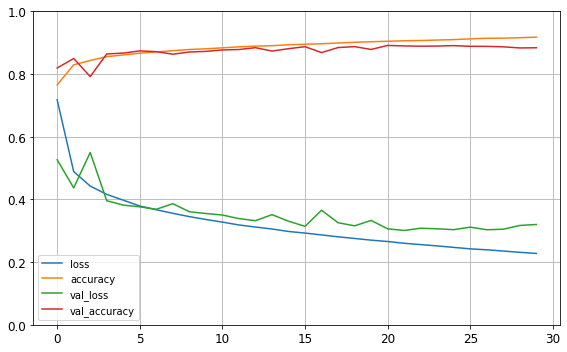

In [73]:
# You can see that both the training accuracy and the validation accuracy
# steadily increase during training, while the training loss and the validation
# loss decrease. Good! Moreover, the validation curves are close to the
# training curves, which means that there is not too much overfitting.

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [75]:
# It is common to get slightly lower performance on the test set than on the 
# validation set, because the hyperparameters are tuned on the validation set, 
# not the test set.
# Remember to resist the temptation to tweak the hyperparameters on
# the test set, or else your estimate of the generalization error will be too optimistic.


model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3459 - accuracy: 0.8784


[0.34585803747177124, 0.8784000277519226]

In [78]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 17ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [80]:
# np.argmax gives teh max in an array


y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 16ms/step


array([9, 2, 1])

In [81]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [82]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure... fashion_mnist_images_plot


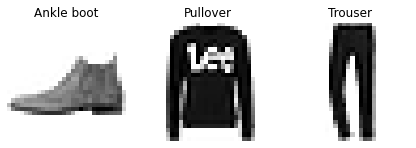

In [83]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()



### Regression MLP (_Multilayer Perceptron_)


In [84]:
# Regression means predicting a value. MLPs can be used for regression tasks. 
# If you want to predict a single value (e.g., the price of a house, given many 
# of its features), then you just need a single output neuron: its output is the 
# predicted value.
#
# Let's load, split and scale the California housing 
# dataset (the original one).
# This dataset is simpler than the one used ealier, since it contains only
# numerical features (there is no ocean_proximity feature), and there is no missing value.
#
# Difference between fit_transform() and transform()
# Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1.
# The fit method is calculating the mean and variance of each of the features present in our data. 
# The transform method is transforming all the features using the respective mean and variance.
# The model learns on the tarin data and calculates the mean and variance but the model should not learn about 
# the test data, and hence just transform().


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [85]:
np.random.seed(42)
tf.random.set_seed(42)

In [86]:
# Using the Sequential API to build, train, evaluate, and use a regression
# MLP to make predictions is quite similar to what we did for classification.
# The main differences are the fact that the output layer has a single neuron
# (since we only want to predict a single value) and uses no activation
# function, and the loss function is the mean squared error. Since the dataset
# is quite noisy, we just use a single hidden layer with fewer neurons than
# before, to avoid overfitting.


model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8727 - val_loss: 2.5817
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7898 - val_loss: 1.3720
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6963 - val_loss: 0.8318
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6456 - val_loss: 0.6746
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6070 - val_loss: 0.5807
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5745 - val_loss: 0.5435
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5492 - val_loss: 0.5152
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5281 - val_loss: 0.4956
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5105 - val_loss: 0.4795
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4961 - val_loss: 0.4655

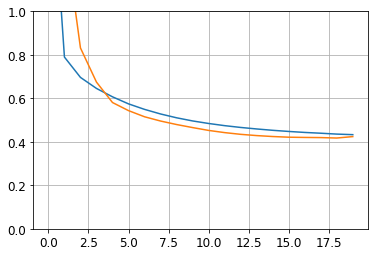

In [87]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [88]:
y_pred

array([[0.66558814],
       [1.6160161 ],
       [3.3775256 ]], dtype=float32)




### Complex models using the functional API


In [89]:
# Not all neural network models are simply sequential. Some may have complex topologies. 
# Some may have multiple inputs and/or multiple outputs. For example, 
# a Wide & Deep neural network connects all or part of the inputs directly 
# to the output layer.

np.random.seed(42)
tf.random.set_seed(42)

In [90]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [91]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [92]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8601 - val_loss: 0.9694
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6393 - val_loss: 0.7612
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5990 - val_loss: 0.5480
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5657 - val_loss: 0.5375
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5455 - val_loss: 0.5433
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5247 - val_loss: 0.4913
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5112 - val_loss: 0.4790
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4978 - val_loss: 0.4850
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4845 - val_loss: 0.4510
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4740 - val_loss: 0.4538

In [93]:
np.random.seed(42)
tf.random.set_seed(42)

In [96]:
# What if you want to send different subsets of input features through the wide or 
# deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path 
# (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).


input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [97]:
# Each output will need its own loss function. Therefore, when we compile
# the model, we should pass a list of losses.


model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1495 - val_loss: 2.3704
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7831 - val_loss: 0.8455
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6779 - val_loss: 0.6342
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6255 - val_loss: 0.5815
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5890 - val_loss: 0.5471
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5603 - val_loss: 0.5218
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5377 - val_loss: 0.4999
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5193 - val_loss: 0.4800
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5038 - val_loss: 0.4657
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4912 - val_loss: 0.4544

In [60]:
np.random.seed(42)
tf.random.set_seed(42)

In [98]:
# There are many use cases in which you may want to have multiple outputs.
# 
# Object detection task, classification and adding a bounding box.
# 
# Similarly, you may have multiple independent tasks based on the same data. Sure, 
# you could train one neural network per task, but in many cases you will get better 
# results on all tasks by training a single neural network with one output per task. 
# This is because the neural network can learn features in the data that are useful
# across tasks. For example, you could perform multitask classification on pictures 
# of faces, using one output to classify the person’s facial expression (smiling, 
# surprised, etc.) and another output to identify whether they are wearing glasses or not.
#
# Another use case is as a regularization technique (i.e., a training constraint 
# whose objective is to reduce overfitting and thus improve the model’s ability to 
# generalize). For example, you may want to add some auxiliary outputs in a neural network
# architecture to ensure that the underlying part of the network learns something 
# useful on its own, without relying on the rest of the network.

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [100]:
# Again passing the loss functions list 

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [101]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 3.1446 - main_output_loss: 2.9115 - aux_output_loss: 5.2424 - val_loss: 2.0658 - val_main_output_loss: 1.7803 - val_aux_output_loss: 4.6356
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1318 - main_output_loss: 0.8143 - aux_output_loss: 3.9897 - val_loss: 1.0735 - val_main_output_loss: 0.7052 - val_aux_output_loss: 4.3888
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8892 - main_output_loss: 0.6589 - aux_output_loss: 2.9623 - val_loss: 1.0215 - val_main_output_loss: 0.6270 - val_aux_output_loss: 4.5715
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7833 - main_output_loss: 0.6136 - aux_output_loss: 2.3106 - val_loss: 1.0204 - val_main_output_loss: 0.5821 - val_aux_output_loss: 4.9653
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7182 - main_output_loss: 0.5867 - aux_output_loss: 1.9019 - val_loss

In [102]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 45ms/step




### Subclassing API to build dynamic models


In [103]:
# The sequential API is static and graph of layers. But thats not always the case.
# Some models involve loops, varying shapes, conditional branching, and other 
# dynamic behaviors. For such cases, or simply if you prefer a more imperative 
# programming style, the Subclassing API is for you.
#
# Simply subclass the Model class, create the layers you need in the
# constructor, and use them to perform the computations you want in the call() method.
#
# The big difference is that you can do pretty much anything you want in the 
# call() method: for loops, if statements, low-level TensorFlow operations.


class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [104]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 2.5411 - output_1_loss: 2.3619 - output_2_loss: 4.1541 - val_loss: 2.2150 - val_output_1_loss: 1.8127 - val_output_2_loss: 5.8360
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.0108 - output_1_loss: 0.8153 - output_2_loss: 2.7704 - val_loss: 1.3208 - val_output_1_loss: 0.6836 - val_output_2_loss: 7.0551
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8069 - output_1_loss: 0.6596 - output_2_loss: 2.1328 - val_loss: 1.2913 - val_output_1_loss: 0.6380 - val_output_2_loss: 7.1711
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7339 - output_1_loss: 0.6101 - output_2_loss: 1.8476 - val_loss: 1.1776 - val_output_1_loss: 0.5849 - val_output_2_loss: 6.5126
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6902 - output_1_loss: 0.5789 - output_2_loss: 1.6920 - val_loss: 1.0437 - val_output_1_loss: 0.5467 - val_ou



### Saving and restoring a model


In [114]:
np.random.seed(42)
tf.random.set_seed(42)

In [115]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [116]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.4877 - val_loss: 1.1324
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8894 - val_loss: 0.8491
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6983 - val_loss: 0.7324
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6437 - val_loss: 0.6097
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6109 - val_loss: 0.5584
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5831 - val_loss: 0.5389
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5595 - val_loss: 0.5276
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5389 - val_loss: 0.4929
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5206 - val_loss: 0.4748
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4889


In [118]:
# Keras will use the HDF5 format to save both the model’s architecture
# (including every layer’s hyperparameters) and the values of all the model
# parameters for every layer (e.g., connection weights and biases). It also
# saves the optimizer (including its hyperparameters and any state it may have).
#
# This will work when using the Sequential API or the Functional API, but
# unfortunately not when using model subclassing. You can use save_weights() and
# load_weights() to at least save and restore the model parameters, but you will
# need to save and restore everything else yourself.


model.save("trained_models/my_keras_model.h5")

In [120]:
model = keras.models.load_model("trained_models/my_keras_model.h5")

In [122]:
model.predict(X_new)

1/1 [==============================] - 0s 17ms/step


array([[0.8714886],
       [1.4894865],
       [3.1455941]], dtype=float32)

In [123]:
model.save_weights("trained_models/my_keras_weights.ckpt")

In [124]:
model.load_weights("trained_models/my_keras_weights.ckpt")




### Using Callbacks during training


In [125]:
# This is quite common to tarin for long hours, especially when training on large datasets. 
# In this case, you should not only save your model at the end of training, 
# but also save checkpoints at regular intervals during training, to avoid 
# losing everything if your computer crashes. But how can you tell the fit() 
# method to save checkpoints? Use callbacks.


keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [127]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [129]:
# The fit() method accepts a callbacks argument that lets you specify a
# list of objects that Keras will call at the start and end of training, at the
# start and end of each epoch, and even before and after processing each
# batch. For example, the ModelCheckpoint callback saves checkpoints of
# your model at regular intervals during training, by default at the end of each epoch.
#
# Moreover, if you use a validation set during training, you can set
# save_best_only=True when creating the ModelCheckpoint . In this case, 
# it will only save your model when its performance on the validation set is
# the best so far. This is also called Early Stopping.
#
# Another way to implement early stopping is to simply use the
# EarlyStopping callback. It will interrupt training when it measures no progress on 
# the validation set for a number of epochs (defined by the patience argument), 
# and it will optionally roll back to the best model.


model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("trained_models/my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("trained_models/my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5038 - val_loss: 0.4620
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4878 - val_loss: 0.4496
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4736 - val_loss: 0.4351
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4599 - val_loss: 0.4423
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4523 - val_loss: 0.4155
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4412 - val_loss: 0.4219
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4366 - val_loss: 0.4020
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4302 - val_loss: 0.3968
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4240 - val_loss: 0.4111
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4288


In [130]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4172 - val_loss: 0.3915
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4136 - val_loss: 0.4418
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4108 - val_loss: 0.4008
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4060 - val_loss: 0.4142
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4052 - val_loss: 0.3776
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4000 - val_loss: 0.4251
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3996 - val_loss: 0.3706
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3966 - val_loss: 0.3693
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3933 - val_loss: 0.3884
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3917 - val_lo

In [131]:
# If you need extra control, you can easily write your own custom callbacks.
# As an example of how to do that, the following custom callback will display the ratio 
# between the validation loss and the training loss during training 
# (e.g., to detect overfitting).


class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [132]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

360/363 [============================>.] - ETA: 0s - loss: 0.3572
val/train: 1.04
363/363 [==============================] - 1s 2ms/step - loss: 0.3575 - val_loss: 0.3730





### TensorBoard for visualization


In [133]:
# TensorBoard is a great interactive visualization tool that you can use to
# view the learning curves during training, compare learning curves between
# multiple runs, visualize the computation graph, analyze training statistics,
# view images generated by your model.


root_logdir = os.path.join(os.curdir, "logs/my_logs")

In [134]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./logs/my_logs/run_2023_03_22-17_51_37'

In [135]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [136]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [137]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 2.0990 - val_loss: 1.7729
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7886 - val_loss: 0.9155
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6865 - val_loss: 0.6119
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6340 - val_loss: 0.5900
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5990 - val_loss: 0.5525
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5689 - val_loss: 0.5262
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5434 - val_loss: 0.4994
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5198 - val_loss: 0.4745
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4988 - val_loss: 0.4553
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4803 - val_loss: 0.4407

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [138]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [139]:
run_logdir2 = get_run_logdir()
run_logdir2

'./logs/my_logs/run_2023_03_22-17_54_54'

In [140]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [141]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [142]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5447 - val_loss: 20.1916
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/30
363/363 [==============================]

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [92]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.






### Hyperparameter Tuning


 - For many problems, you can begin with a single hidden layer and get reasonable results. An MLP with just one hidden layer can theoretically model even the most complex functions, provided it has enough neurons. 
 - Reusing the previously learned model (weights and biases) so that the network wil lnot have to learn from scratch all the lower-level structures and it will only have to learn the higher-level structures is called _transfer learning_.
 - The number of neurons in the input and output layers is determined by the type of input and output your task requires. As for the hidden layers, it used to be common to size them to form a pyramid, with fewer and fewer neurons at each layer—the rationale being that many low-level features can coalesce into far fewer high-level features.
 - The learning rate is arguably the most important hyperparameter. In general, the optimal learning rate is about half of the maximum learning rate (i.e., the learning rate above which the training algorithm diverges).
 - Choosing a better optimizer than plain old Mini-batch Gradient Descent (and tuning its hyperparameters) is also quite important.
 - The batch size can have a significant impact on your model’s performance and training time. The main benefit of using large batch sizes is that hardware accelerators like GPUs can process them efficiently, so the training algorithm will see more instances per second. Therefore, many researchers and practitioners recommend using the largest batch size that can fit in GPU RAM.
 - In general, the ReLU activation function will be a good default for all hidden layers. For the output layer, it really depends on your task.


In [145]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [146]:

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [147]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/tmp/ipykernel_212852/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [148]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0280 - val_loss: 5.6545
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6264 - val_loss: 7.4106
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5570 - val_loss: 6.7768
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4980 - val_loss: 4.9808
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4672 - val_loss: 2.7542
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4464 - val_loss: 1.8410
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4346 - val_loss: 0.8282
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4167 - val_loss: 0.4425
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4069 - val_loss: 0.3813
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4015 - val_lo

In [149]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3630


In [150]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 38ms/step


In [151]:
np.random.seed(42)
tf.random.set_seed(42)

In [152]:
# Because of flexibility of Keras, there are a tons of options to tweak. One simple option 
# to use GridSearchCV or RandomizedSearchCV to explore the hyperparameter space.
#
# We don’t want to train and evaluate a single model like this, though we
# want to train hundreds of variants and see which one performs best on the
# validation set. Since there are many hyperparameters, it is preferable to use a 
# randomized search rather than grid search.


from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 3.5845 - val_loss: 1.8168
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.2517 - val_loss: 0.8650
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7721 - val_loss: 0.6747
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6522 - val_loss: 0.6237
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6150 - val_loss: 0.6061
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5962 - val_loss: 0.8091
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5888 - val_loss: 0.7575
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5810 - val_loss: 0.7742
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5768 - val_loss: 0.5837
Epoch 10/100
242/242 [========

242/242 [==============================] - 0s 2ms/step - loss: 961.3315 - val_loss: 186993.4844
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 2001.1121 - val_loss: 738082.8750
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 14289.1621 - val_loss: 2914019.5000
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 36323.4766 - val_loss: 11552792.0000
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 254893.8594 - val_loss: 48039296.0000
Epoch 11/100
121/121 [==============================] - 0s 998us/step - loss: 500044.2812
[CV] END learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21; total time=   5.1s
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.2176 - val_loss: 9.3008
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5374 - val_loss: 15.0596
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 

Epoch 47/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3742 - val_loss: 0.3916
Epoch 48/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3729 - val_loss: 0.3872
Epoch 49/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3717 - val_loss: 0.3849
Epoch 50/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3706 - val_loss: 0.3906
Epoch 51/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3694 - val_loss: 0.3843
Epoch 52/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3686 - val_loss: 0.3861
Epoch 53/100
121/121 [==============================] - 0s 1ms/step - loss: 0.3802
[CV] END learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87; total time=  30.0s
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 2.5816 - val_loss: 22.3278
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.9448 - val_loss: 21.0806
Epoch 3/10

Epoch 45/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4424 - val_loss: 0.4228
Epoch 46/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4399 - val_loss: 0.4202
Epoch 47/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4379 - val_loss: 0.4202
Epoch 48/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4356 - val_loss: 0.4184
Epoch 49/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4336 - val_loss: 0.4186
Epoch 50/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4316 - val_loss: 0.4172
Epoch 51/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4296 - val_loss: 0.4140
Epoch 52/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4280 - val_loss: 0.4157
Epoch 53/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4261 - val_loss: 0.4163
Epoch 54/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4243

Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9609 - val_loss: 69.5530
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9517 - val_loss: 123.7018
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 1.8119 - val_loss: 358.8937
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 2.7872 - val_loss: 695.6044
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 12.0761 - val_loss: 1535.4867
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 15.0184 - val_loss: 3519.3513
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 55.1735 - val_loss: 8042.1997
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 86.4202 - val_loss: 17943.4590
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 297.5990 - val_loss: 42877.1484
Epoch 11/100
121/121 [==============================] - 0s 9

242/242 [==============================] - 0s 2ms/step - loss: 0.3710 - val_loss: 0.3609
Epoch 25/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3714 - val_loss: 0.3449
Epoch 26/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3718 - val_loss: 0.3466
Epoch 27/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3669 - val_loss: 0.3546
Epoch 28/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3666 - val_loss: 0.3471
Epoch 29/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4061 - val_loss: 0.3514
Epoch 30/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3883 - val_loss: 0.3451
Epoch 31/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3640 - val_loss: 0.3421
Epoch 32/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3615 - val_loss: 0.3461
Epoch 33/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3595 - val_loss: 

Epoch 29/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4616 - val_loss: 0.5057
Epoch 30/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4579 - val_loss: 0.4978
Epoch 31/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4544 - val_loss: 0.4909
Epoch 32/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4511 - val_loss: 0.4866
Epoch 33/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4480 - val_loss: 0.4814
Epoch 34/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4450 - val_loss: 0.4757
Epoch 35/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4423 - val_loss: 0.4710
Epoch 36/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4396 - val_loss: 0.4657
Epoch 37/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4373 - val_loss: 0.4629
Epoch 38/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4350

Epoch 35/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5635 - val_loss: 0.5608
Epoch 36/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5586 - val_loss: 0.5510
Epoch 37/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5539 - val_loss: 0.5440
Epoch 38/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5490 - val_loss: 0.5397
Epoch 39/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5443 - val_loss: 0.5329
Epoch 40/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5397 - val_loss: 0.5280
Epoch 41/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5351 - val_loss: 0.5192
Epoch 42/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5309 - val_loss: 0.5142
Epoch 43/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5266 - val_loss: 0.5093
Epoch 44/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5226

Epoch 64/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3615 - val_loss: 0.3683
Epoch 65/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3609 - val_loss: 0.3424
Epoch 66/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3601 - val_loss: 0.3631
Epoch 67/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3597 - val_loss: 0.3450
Epoch 68/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3620 - val_loss: 0.3821
Epoch 69/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3586 - val_loss: 0.3396
Epoch 70/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3579 - val_loss: 0.3733
Epoch 71/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3583 - val_loss: 0.3407
Epoch 72/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3577 - val_loss: 0.3448
Epoch 73/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3589

Epoch 50/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5375 - val_loss: 0.8323
Epoch 51/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5373 - val_loss: 0.8315
Epoch 52/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5370 - val_loss: 0.8271
Epoch 53/100
121/121 [==============================] - 0s 956us/step - loss: 0.5402
[CV] END learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49; total time=  21.8s
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 5.7558 - val_loss: 7.2818
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 4.3079 - val_loss: 6.2063
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 3.2930 - val_loss: 5.5063
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 2.5713 - val_loss: 5.0605
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 2.0513 - val_loss: 4.7965
Epoch 6/100
2

242/242 [==============================] - 1s 2ms/step - loss: 0.3209 - val_loss: 0.3740
Epoch 67/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3211 - val_loss: 0.4058
Epoch 68/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3220 - val_loss: 0.5253
Epoch 69/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3213 - val_loss: 0.5614
Epoch 70/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3216 - val_loss: 0.5455
Epoch 71/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3219 - val_loss: 0.4850
Epoch 72/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3206 - val_loss: 0.4637
Epoch 73/100
121/121 [==============================] - 0s 1ms/step - loss: 0.3268
[CV] END learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42; total time=  39.2s
Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8064 - val_loss: 14.1998
Epoch 2/100
363/363 [==

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fcd540f1c70>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcd4f6c1c70>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   verbose=2)

In [153]:
rnd_search_cv.best_params_

{'learning_rate': 0.008339092654580042, 'n_hidden': 1, 'n_neurons': 38}

In [154]:
rnd_search_cv.best_score_

-0.3575756947199504

In [155]:
rnd_search_cv.best_estimator_

In [156]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 972us/step - loss: 0.3276


-0.32757094502449036

In [157]:
model = rnd_search_cv.best_estimator_.model
model

In [158]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 970us/step - loss: 0.3276


0.32757094502449036